In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install missingno
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
trainDf = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
testDf = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

trainDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(trainDf.shape)
print(testDf.shape)

(1460, 81)
(1459, 80)


Here we see that we have 81 columns and 1460 rows. Lets check for null and duplicate values.

In [5]:
#since there are 81 columns it is not possible to see the sum of each and every one them
nullValueColumns = trainDf.columns[trainDf.isnull().any()] 
print(nullValueColumns)
print(len(nullValueColumns))

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
19


In [6]:
nullValueColumns_Test = testDf.columns[testDf.isnull().any()]
print(nullValueColumns_Test)
print(len(nullValueColumns_Test))

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')
33


Interesting to see that testing data has more null value columns as compared to training data

In [7]:
print("For Training Data: ",trainDf.duplicated().sum())
print("For Testing Data: ",testDf.duplicated().sum())

For Training Data:  0
For Testing Data:  0


The data has no duplicate values

In [8]:
trainDf.info() #we have 1460 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
testDf.info() #we have 1459 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df = trainDf.loc[trainDf['PoolQC'].notnull()]
print(df['SalePrice'].describe())
print("--"*50)
print(trainDf['SalePrice'].describe())

count         7.000000
mean     288138.571429
std      206071.850935
min      160000.000000
25%      176000.000000
50%      235000.000000
75%      262485.000000
max      745000.000000
Name: SalePrice, dtype: float64
----------------------------------------------------------------------------------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

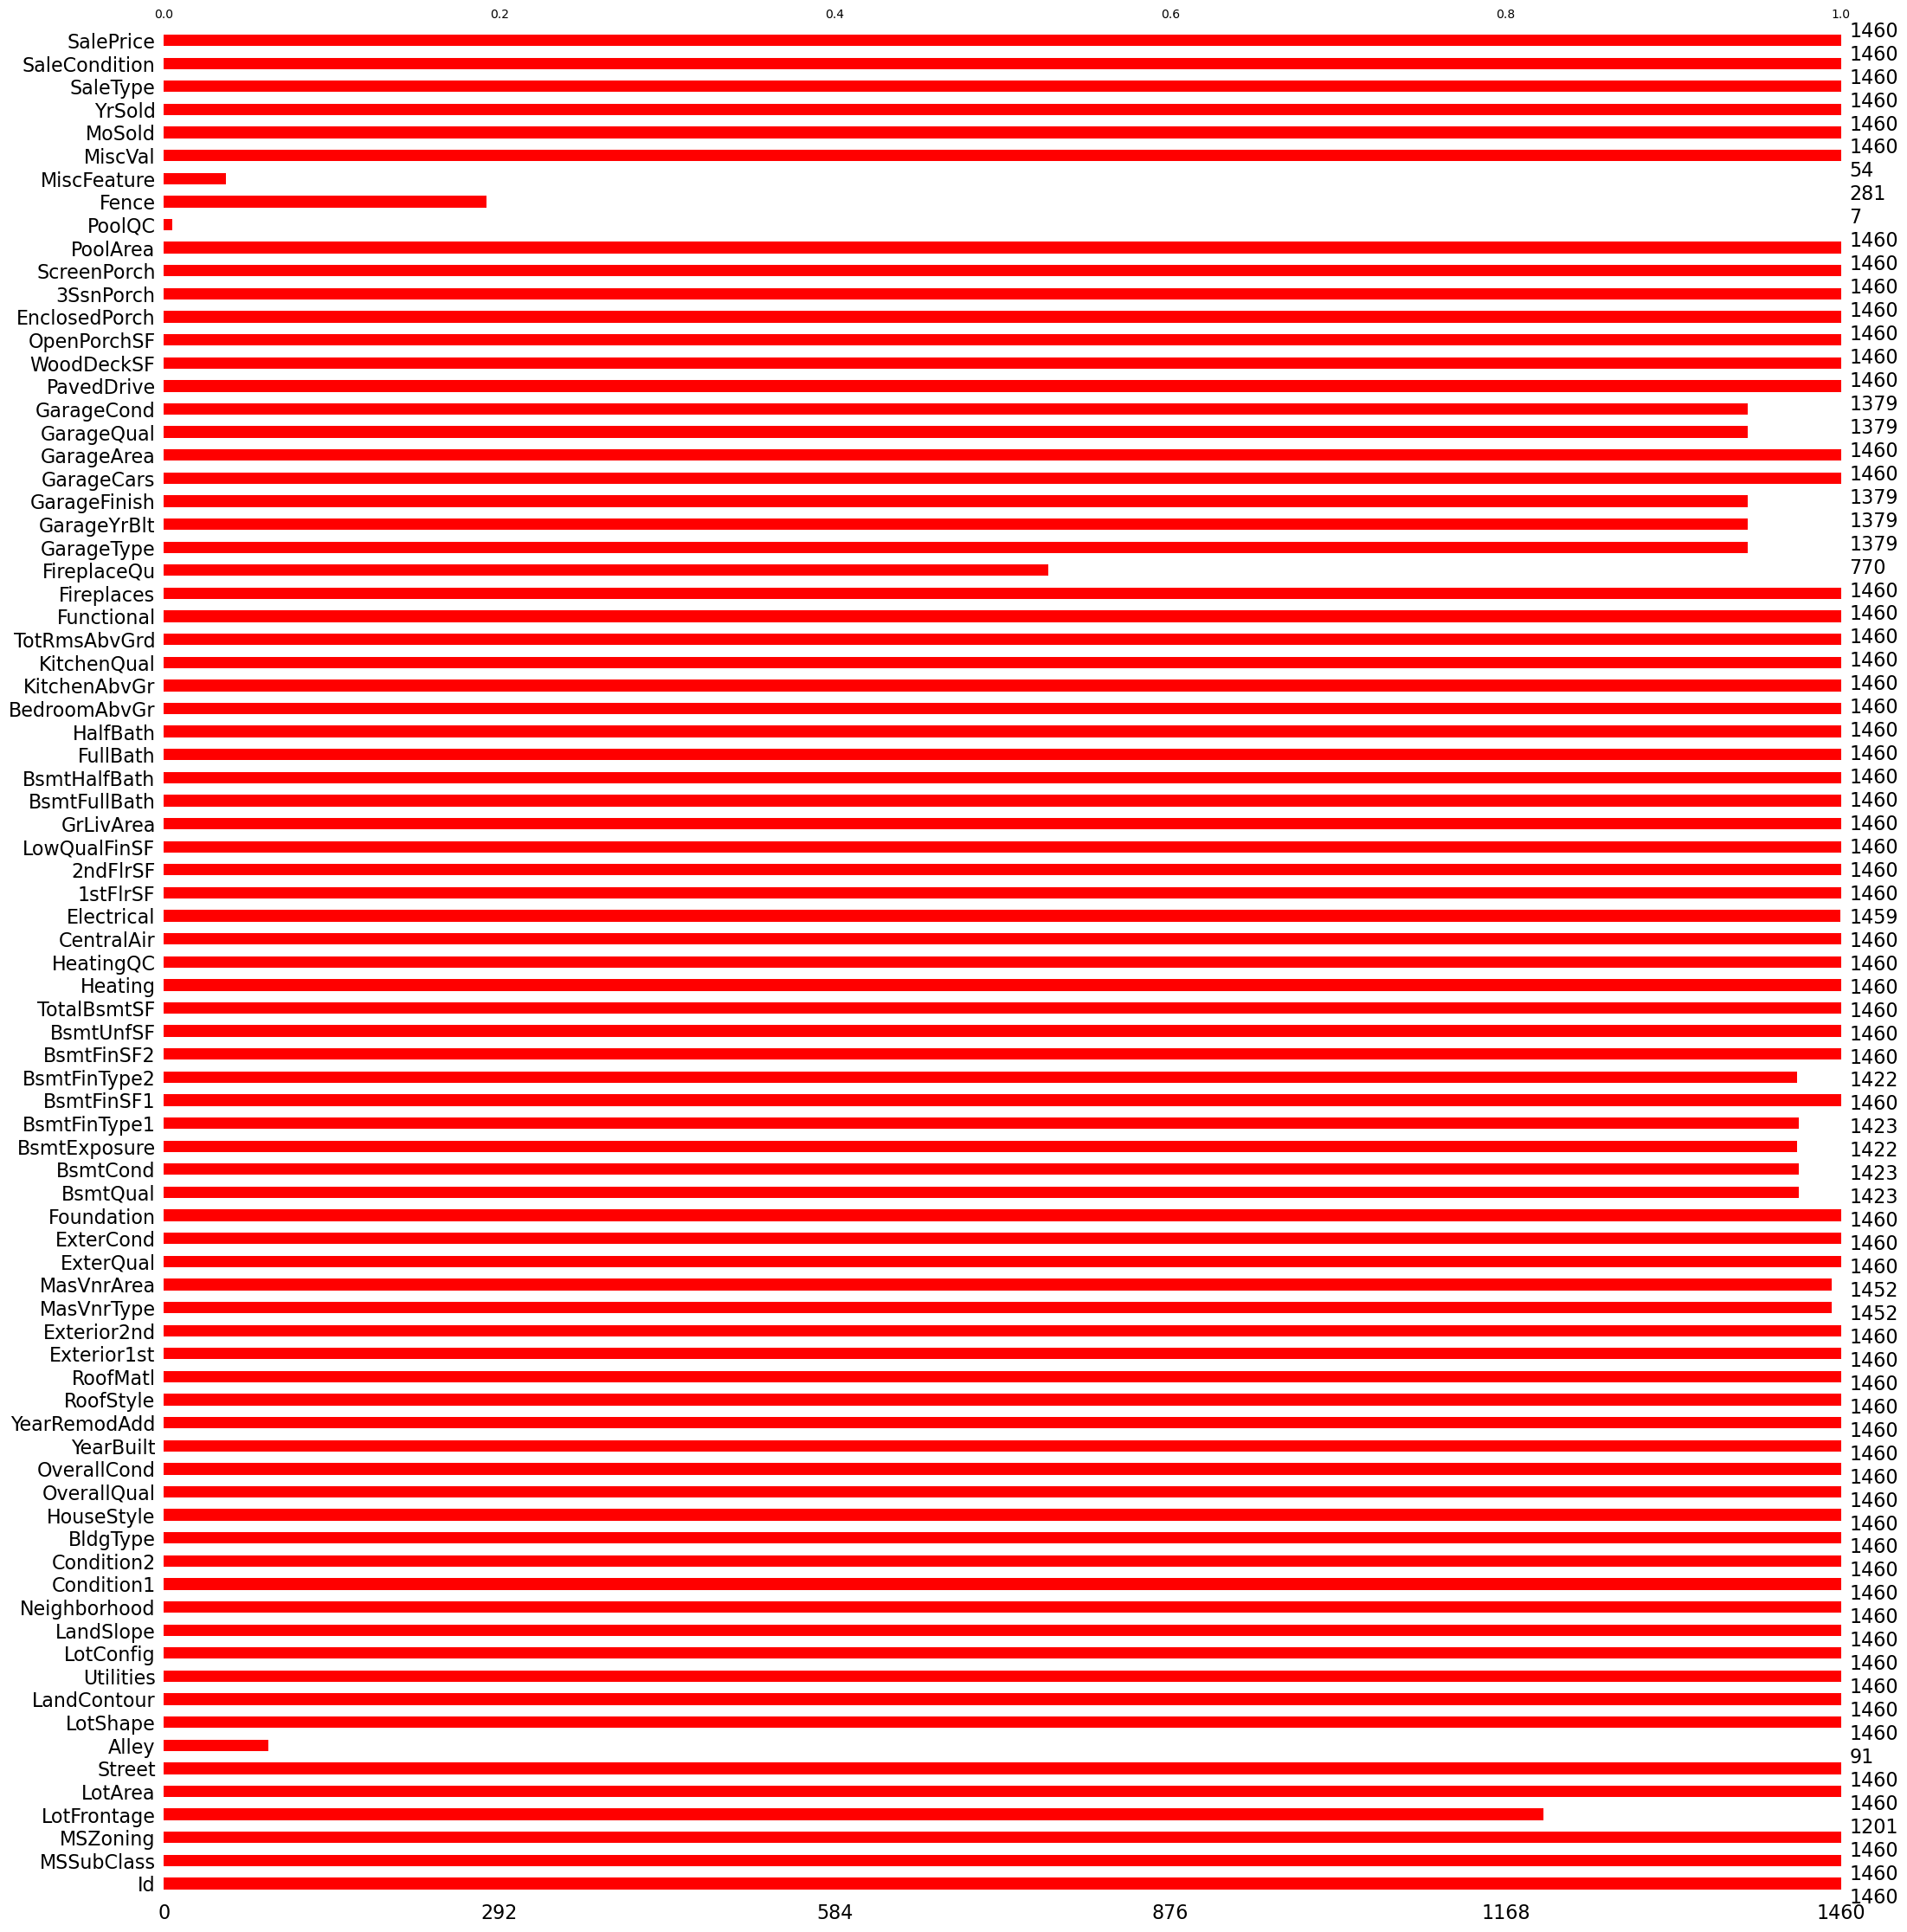

In [11]:
msno.bar(trainDf,color = 'red')

<AxesSubplot:>

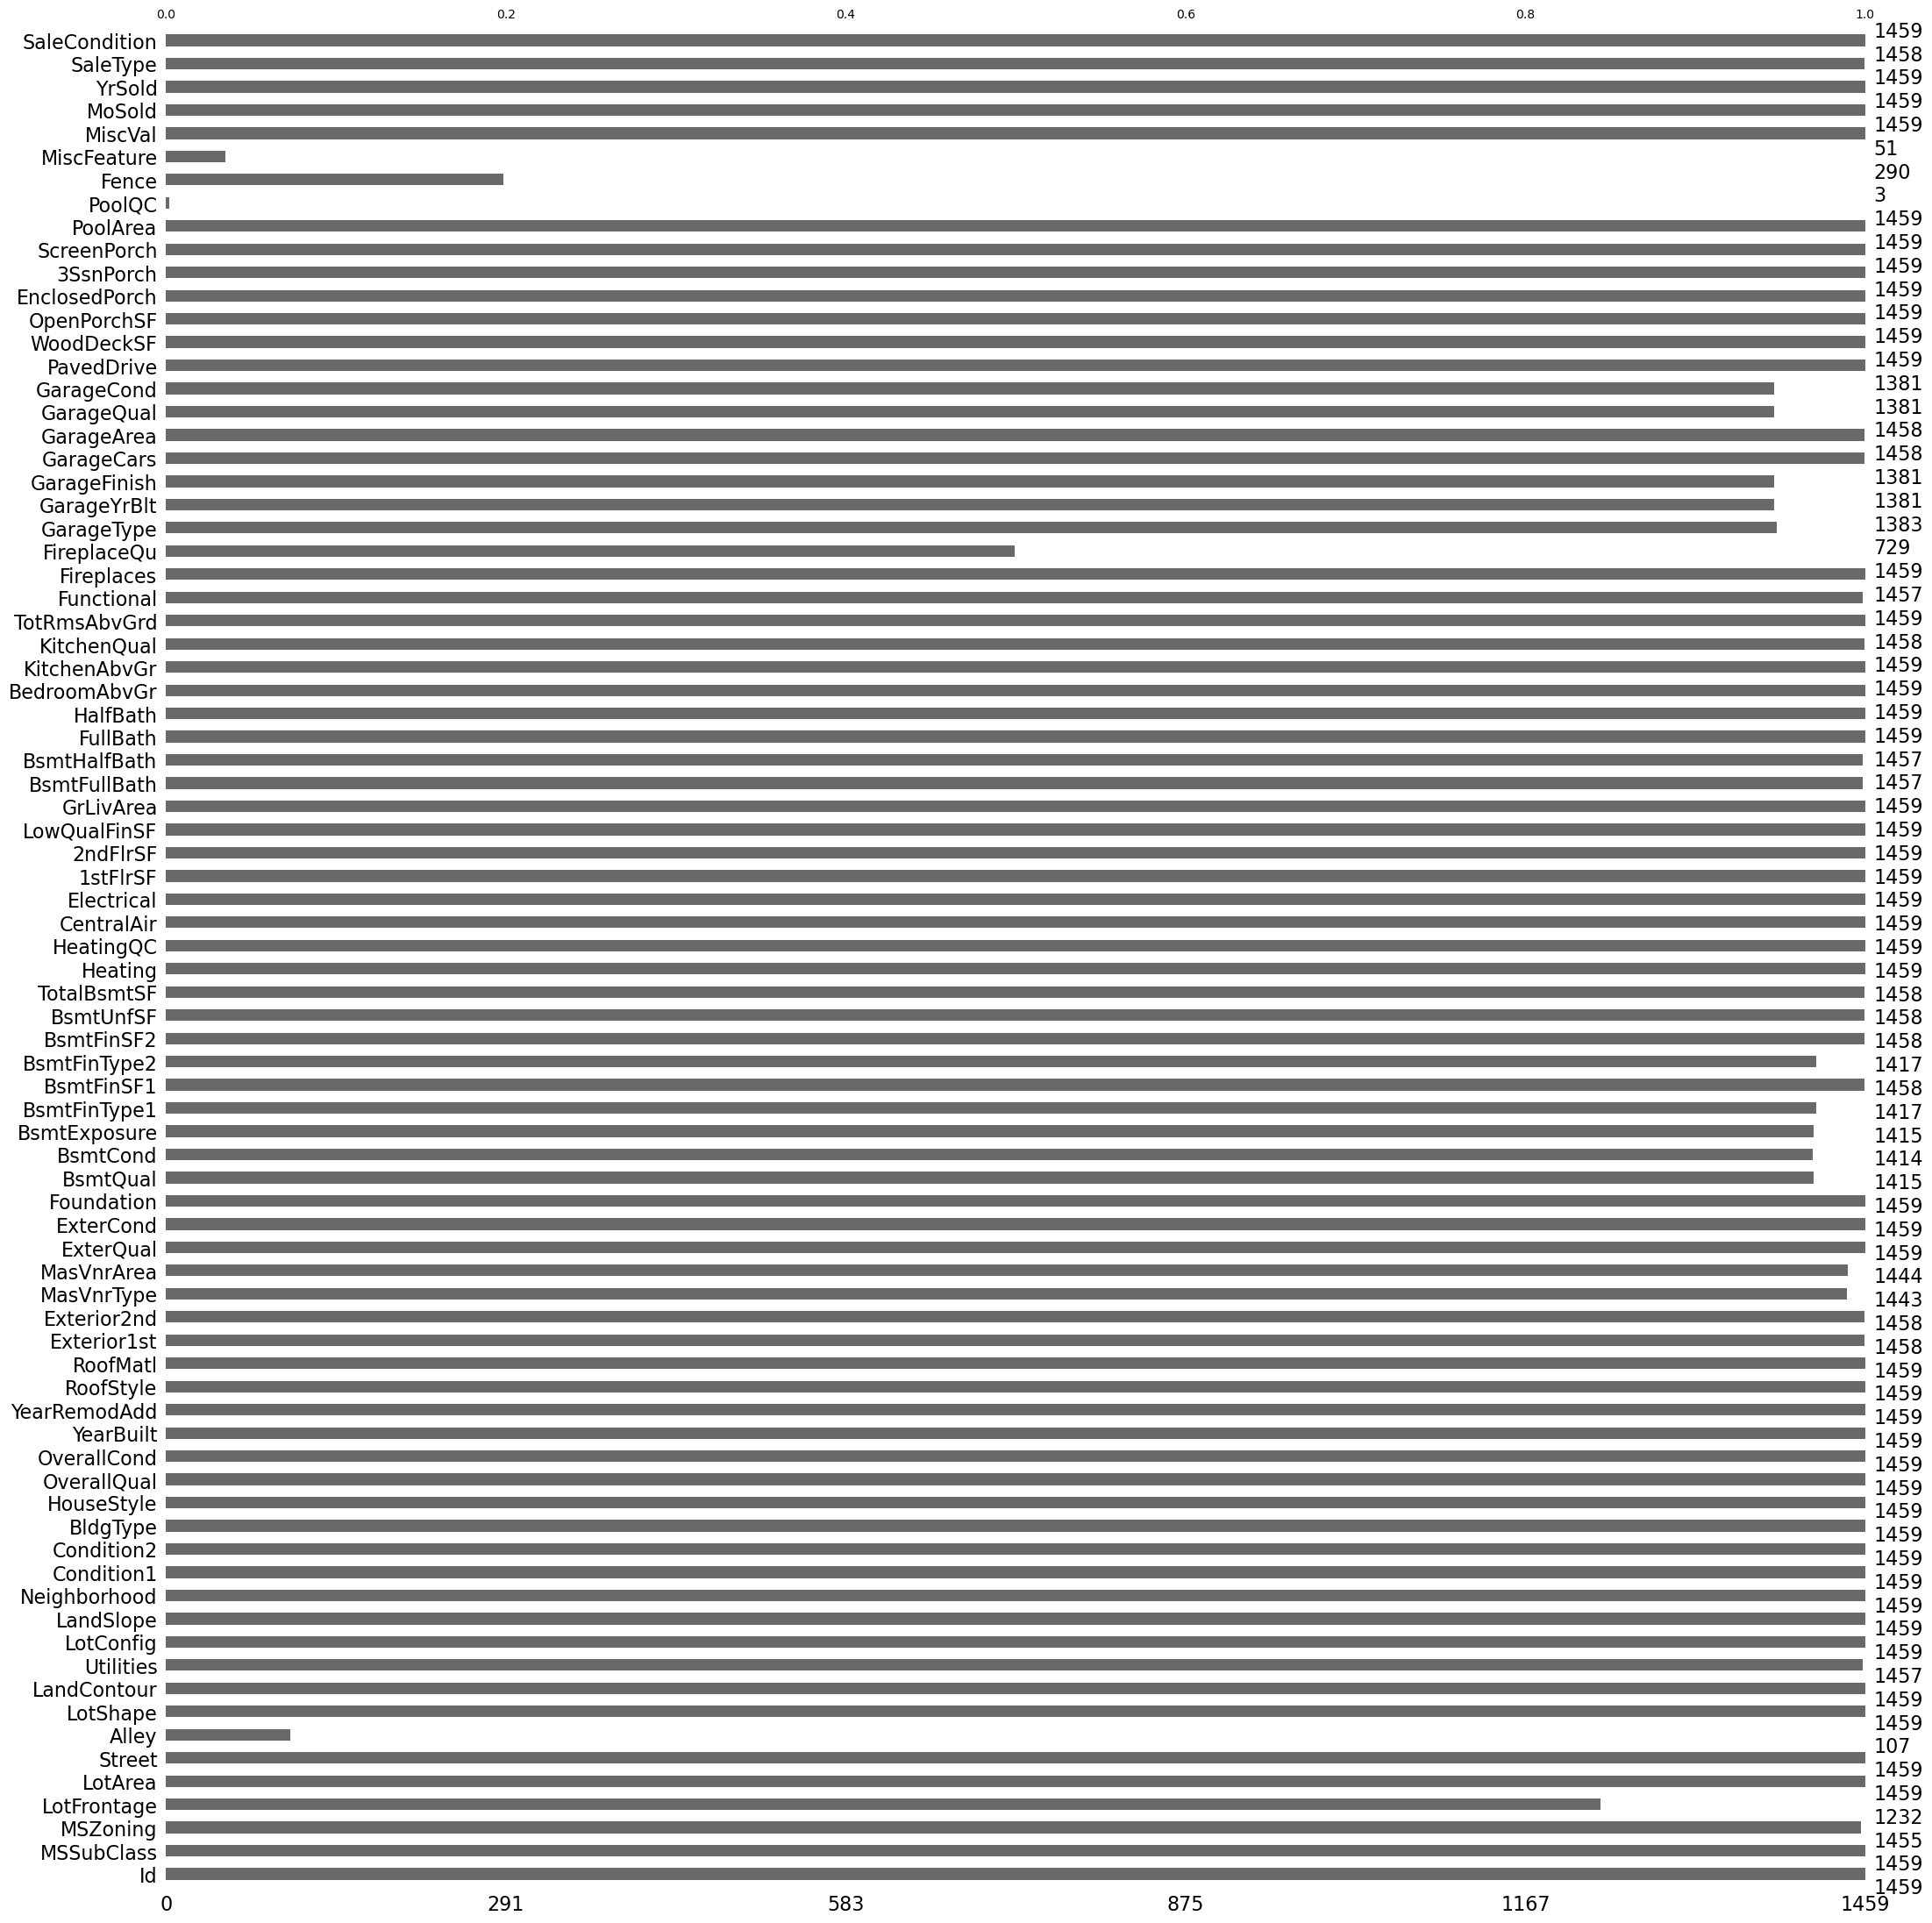

In [12]:
msno.bar(testDf)

From the above graphs we can see that the features such as MiscFeature,PoolQc, Fence, Alley, FireplaceQu, GarageType have more than 50% missing data. Dropping the columns

In [13]:
#dropCols= ['MiscFeature','PoolQC','Fence','Alley', 'FireplaceQu', 'GarageType']

trainDf.drop(['MiscFeature','PoolQC','Fence','Alley', 'FireplaceQu', 'GarageType'],axis=1,inplace=True)
testDf.drop(['MiscFeature','PoolQC','Fence','Alley', 'FireplaceQu', 'GarageType'],axis=1,inplace=True)
nullValueColumns = trainDf.columns[trainDf.isnull().any()] 
print(nullValueColumns)
nullValueColumnsT = testDf.columns[testDf.isnull().any()] 
print(nullValueColumnsT)
    

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')
Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sales price Distribution')

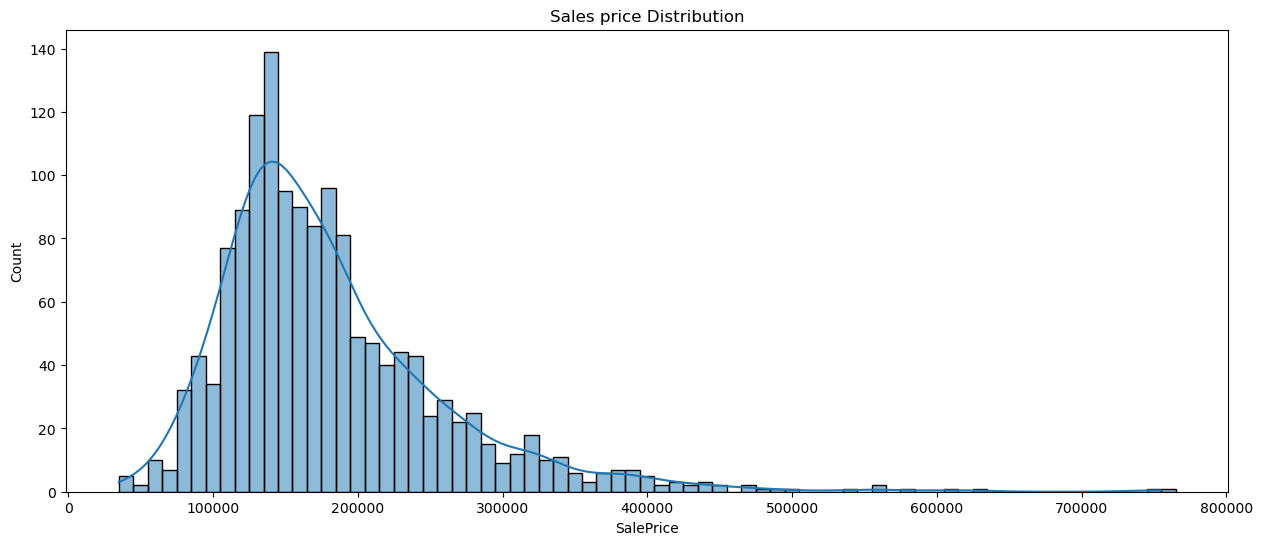

In [15]:
plt.figure(figsize = (15,6))
sns.histplot(data=trainDf, x= 'SalePrice',kde =True,binwidth=10000)
plt.title('Sales price Distribution')

We can see that the sale price has a bell curve which reaches its maximum at price of 140000 and then curve starts falling.

In [16]:
trainDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Lets look at the correlation in the data

<AxesSubplot:>

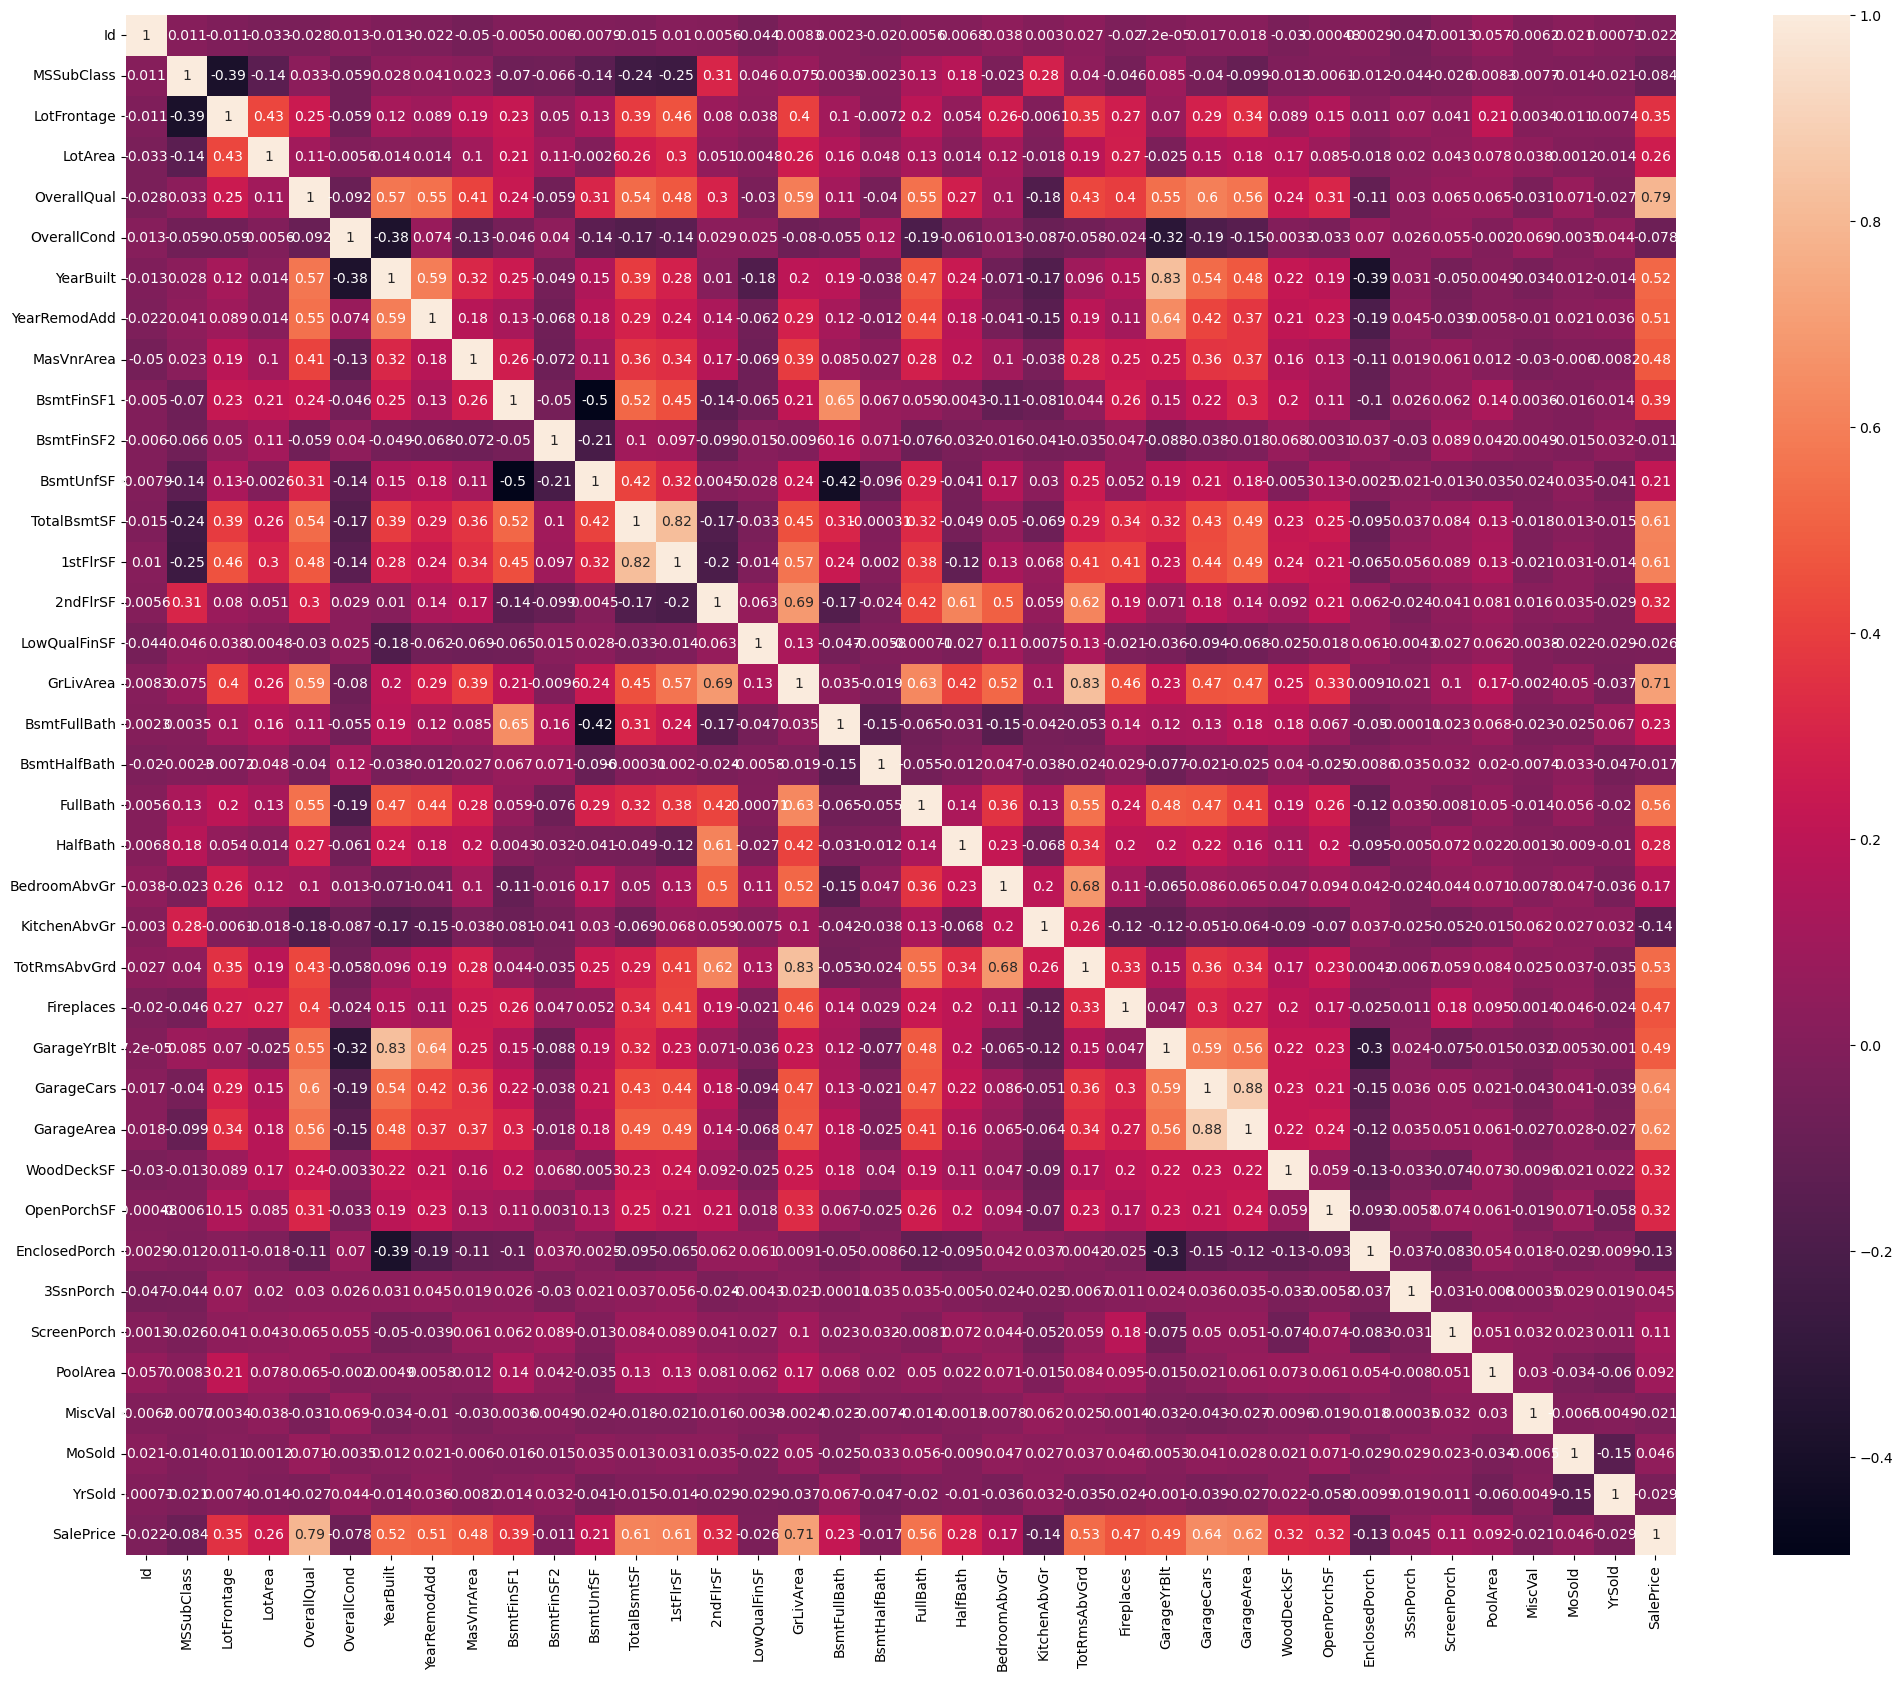

In [17]:
plt.figure(figsize=(25,20))
sns.heatmap(trainDf.corr(),annot= True)

Lets print the top 20 correlated varriables in the data

In [18]:
l = trainDf.corr().abs()
#print(len(l))
print(l.unstack().sort_values(ascending=False).drop_duplicates()[:21])


Id            Id              1.000000
GarageArea    GarageCars      0.882475
GarageYrBlt   YearBuilt       0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
SalePrice     GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
YearRemodAdd  GarageYrBlt     0.642277
SalePrice     GarageCars      0.640409
GrLivArea     FullBath        0.630012
GarageArea    SalePrice       0.623431
TotRmsAbvGrd  2ndFlrSF        0.616423
TotalBsmtSF   SalePrice       0.613581
HalfBath      2ndFlrSF        0.609707
1stFlrSF      SalePrice       0.605852
OverallQual   GarageCars      0.600671
GrLivArea     OverallQual     0.593007
YearBuilt     YearRemodAdd    0.592855
dtype: float64


In [21]:
X = trainDf.drop('SalePrice', axis = 1)
y = trainDf['SalePrice']


In [22]:
l = X.corr().abs()
#print(len(l))
print(l.unstack().sort_values(ascending=False).drop_duplicates()[:21])

Id            Id              1.000000
GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
TotRmsAbvGrd  GrLivArea       0.825489
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
FullBath      GrLivArea       0.630012
TotRmsAbvGrd  2ndFlrSF        0.616423
2ndFlrSF      HalfBath        0.609707
OverallQual   GarageCars      0.600671
              GrLivArea       0.593007
YearRemodAdd  YearBuilt       0.592855
GarageCars    GarageYrBlt     0.588920
OverallQual   YearBuilt       0.572323
1stFlrSF      GrLivArea       0.566024
GarageArea    GarageYrBlt     0.564567
              OverallQual     0.562022
FullBath      TotRmsAbvGrd    0.554784
dtype: float64


Fill the missing Values,there are 2 types of variables in the data: Categorical and Numerical;
For the categorical I replace the themissing values with the mode of the value and for the numerical I replace using the mean value.

In [23]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
print(numerical_cols)
print(len(numerical_cols))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
37


In [24]:
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
print(categorical_cols)
print(len(categorical_cols))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
37


In [33]:
for cat in categorical_cols:
    X[cat] = X[cat].fillna(X[cat].mode()[0])
    testDf[cat] = testDf[cat].fillna(testDf[cat].mode()[0])
for num in numerical_cols:
    X[num] = X[num].fillna(X[num].mean())
    testDf[num] = testDf[num].fillna(testDf[num].mean())
    

In [35]:
#nullValueColumns = X.columns[X.isnull().any()] 
#print(nullValueColumns)
nullValueColumnsT = testDf.columns[testDf.isnull().any()] 
print(nullValueColumnsT)

Index([], dtype='object')


In [36]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [37]:
X.shape

(1460, 74)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

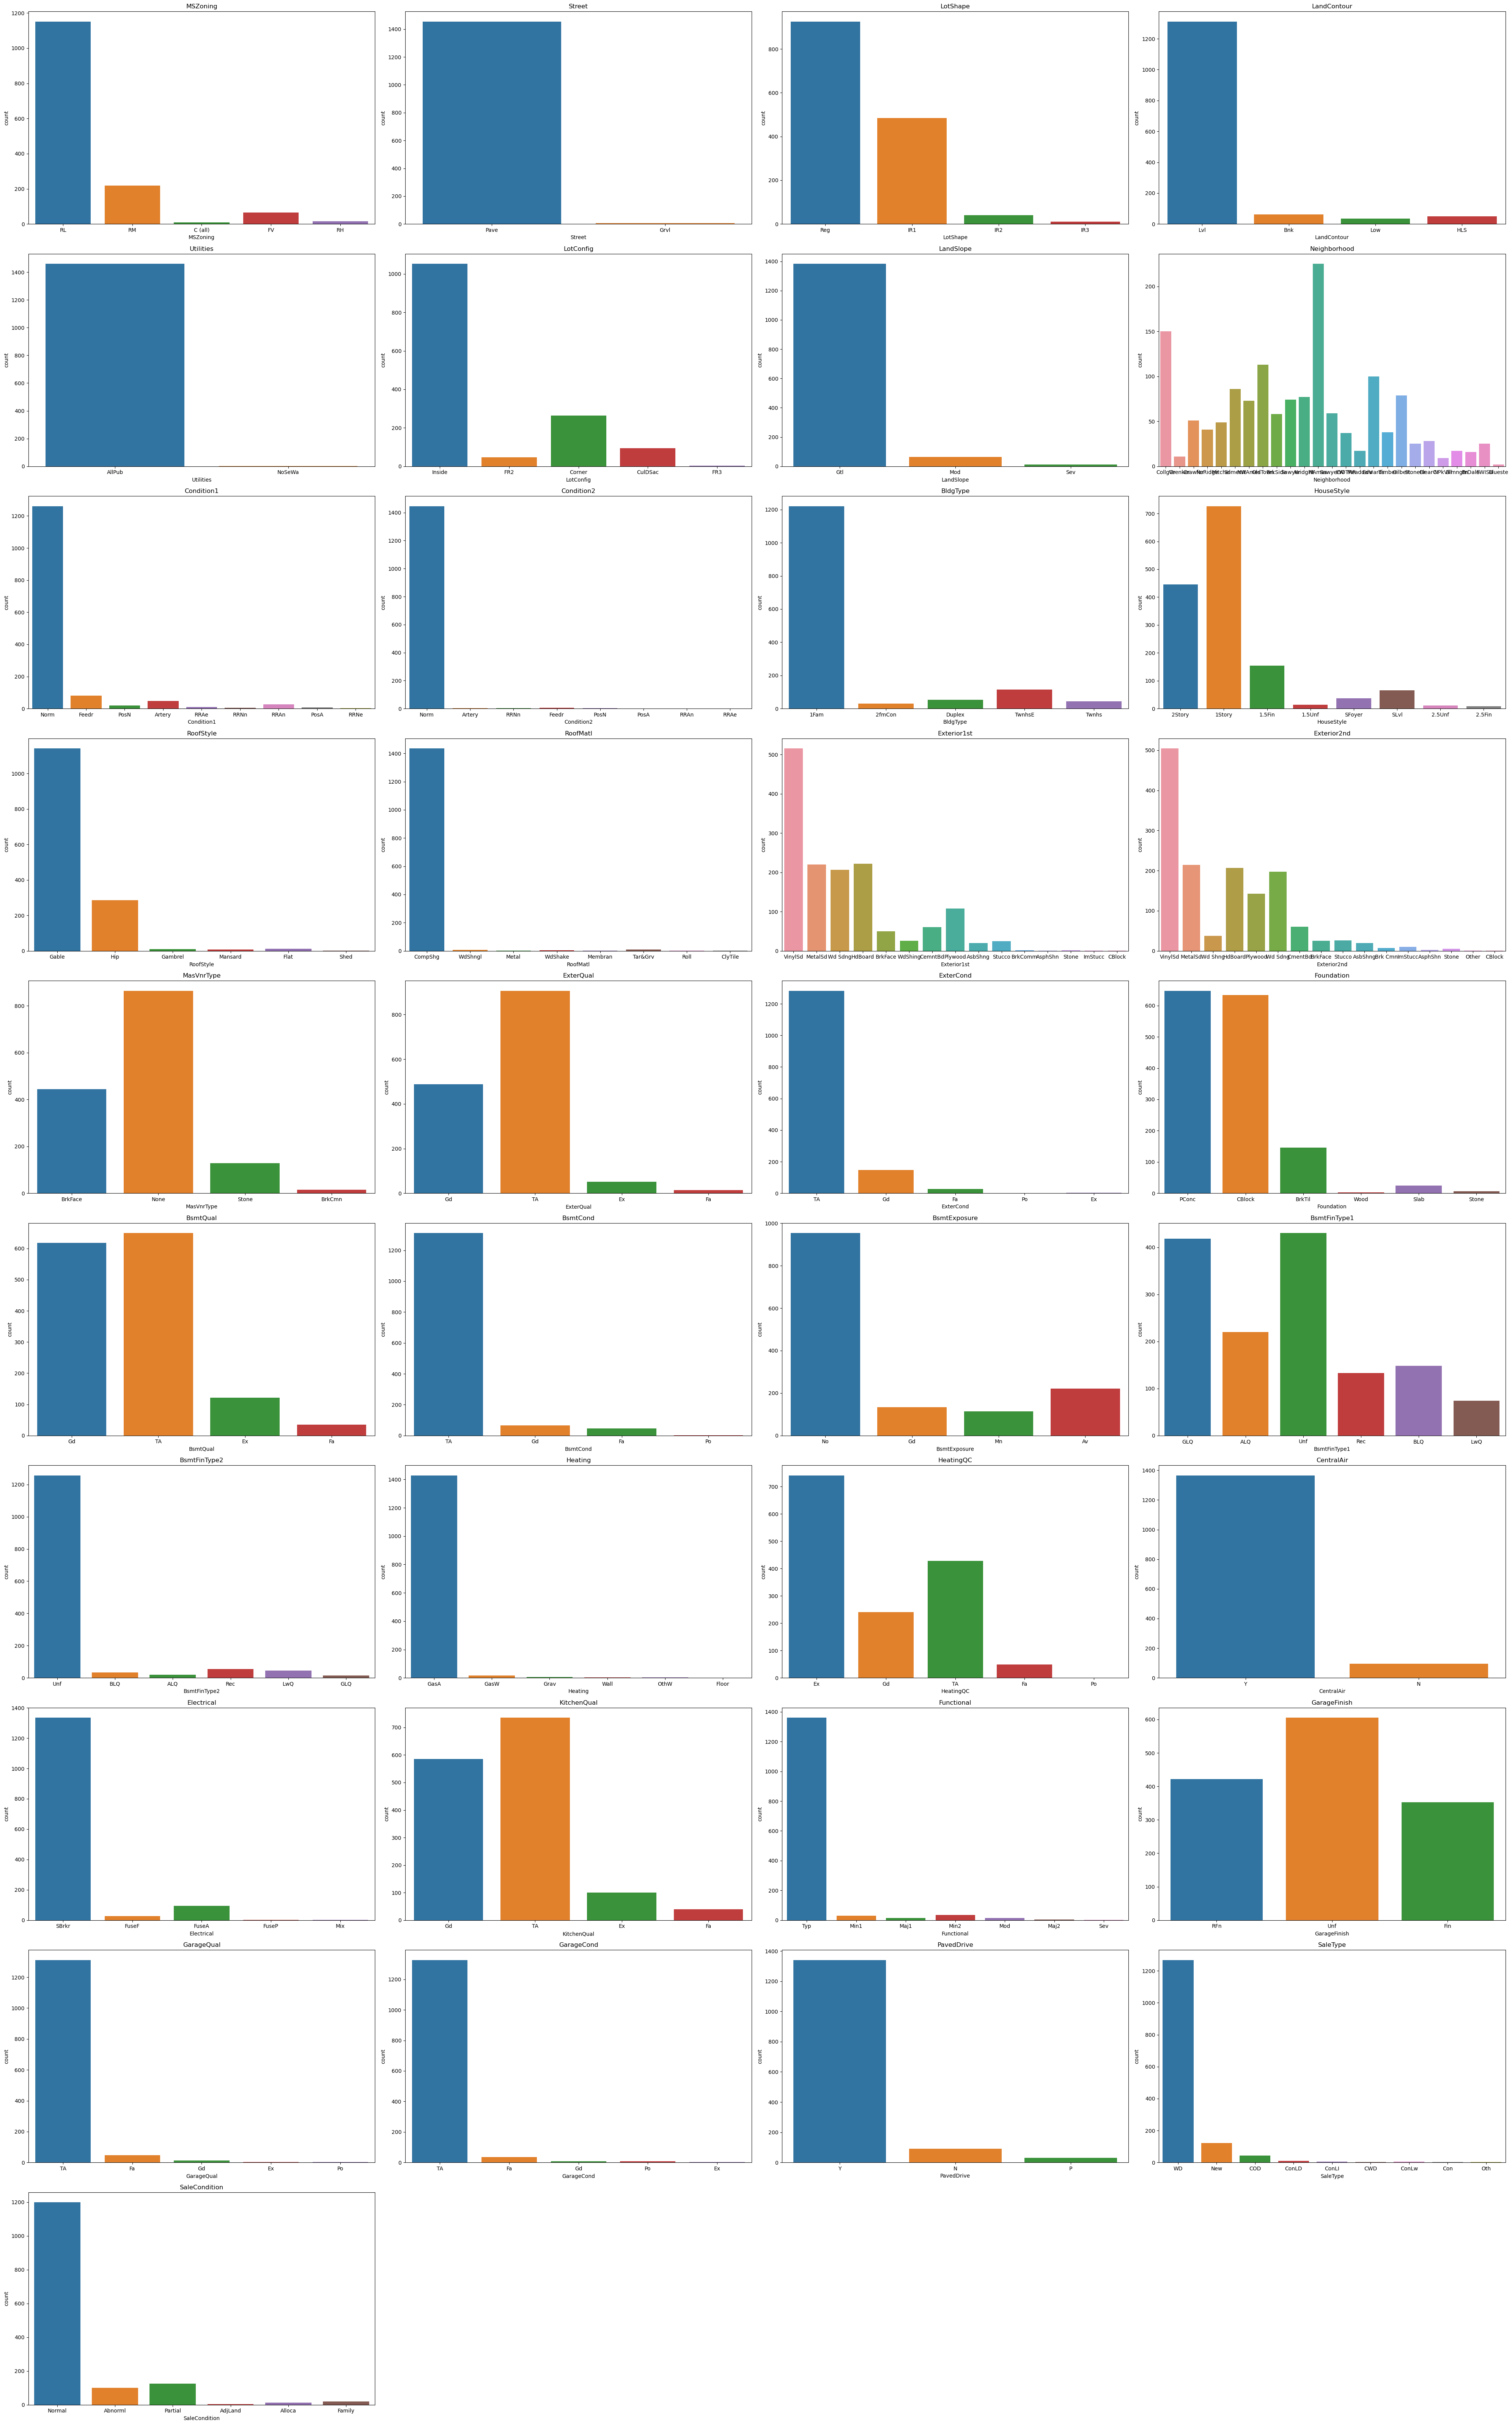

In [39]:
fig=plt.figure(figsize=(40,64))
for i, var_name in enumerate(categorical_cols):
    ax=fig.add_subplot(10,4,i+1)
    sns.countplot(data=trainDf, x=var_name, axes=ax)
    ax.set_title(var_name)
fig.tight_layout()  
plt.show()

From the above groags it is clear that, we have few categories, out which a single category dominates the most, so I replace the categotries by mode.

In [45]:
for cato in categorical_cols:
    X[cato] = X[cato].astype('category')
    X[cato] = X[cato].cat.codes
X.head()   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4


In [46]:
for cato in categorical_cols:
    testDf[cato] = testDf[cato].astype('category')
    testDf[cato] = testDf[cato].cat.codes
testDf.head()   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [48]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [49]:
#for col in X.columns:
 #   X[col] = X[col].astype(int)
#X.info()    

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [52]:
testDf = scaler.fit_transform(testDf)

In [54]:
testDf.shape

(1459, 74)

In [53]:
X= pd.DataFrame(X)
#print(X.shape)
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1168, 74)
(292, 74)
(1168,)
(292,)


In [55]:
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
254,-1.128206,-0.872563,-0.045532,-0.002269,-0.212153,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.11911,1.645210,0.313867,0.208502
1066,0.798404,0.073375,-0.045532,-0.501895,-0.268578,0.064238,-1.378933,0.314667,-0.02618,0.604670,...,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.48911,0.891994,0.313867,0.208502
638,-0.217100,-0.636078,-0.045532,-0.138531,-0.174369,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.704483,2.324878,-0.116339,-0.270208,-0.068692,-0.087688,-0.48911,0.138777,0.313867,0.208502
799,0.164901,-0.163109,-0.045532,-0.456474,-0.332419,0.064238,0.750731,0.314667,-0.02618,-1.861302,...,-0.704483,3.961587,-0.116339,-0.270208,-0.068692,-0.087688,-0.11911,-0.614439,0.313867,0.208502
380,-0.829249,-0.163109,-0.045532,-0.910680,-0.552908,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.704483,3.601511,-0.116339,-0.270208,-0.068692,-0.087688,-0.48911,1.645210,0.313867,0.208502


In [56]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state =42).fit(Xtrain,ytrain)
ypred = reg.predict(Xtest)



In [57]:
from sklearn.metrics import mean_squared_error
print("RMSE",np.sqrt(mean_squared_error(ytest,ypred)))

RMSE 43508.78767028187


In [59]:
from sklearn.metrics import r2_score
r2_score(ytest, ypred, multioutput='variance_weighted')  
reg.score(Xtest,ytest)

0.7532028556016419

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = DecisionTreeRegressor(random_state =42).fit(Xtrain,ytrain)
ypred = reg.predict(Xtest)

In [63]:
Result = reg.predict(testDf)
pd.DataFrame(Result).to_csv('Results')
print("RMSE",np.sqrt(mean_squared_error(ytest,ypred)))
#print("Accuracy Score: ",reg.score(Xtest,ytest))
print("R2 Score: ",r2_score(ytest, ypred, multioutput='variance_weighted') )

RMSE 43508.78767028187
Accuracy Score:  0.7532028556016419
R2 Score:  0.7532028556016419
